# Wikipedia Metrics Plots

## 4b_Wikipedia_Metrics_Plots.ipynb

1) Visualize relationships between Wikipedia activity metrics using scatterplots
* (A) No. of edits vs. No. of users
* (B) Size of edits vs. No. of users
2) Model these relationships using
* mean ration
* linear regression

## Import libraries

1. pandas - Python Data Analysis library (https://pandas.pydata.org/)
2. numpy - Numerical Python (https://numpy.org/)
3. matplotlib - Python Plotting Library (https://matplotlib.org/)
4. scipy - Python Library for Scientific Computing (https://www.scipy.org/)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Read CSV file with Wikipedia activity metrics

In [6]:
fn = "DIY_Data_Analytics/output/wikipedia_metrics.csv"
df = pd.read_csv(fn)

In [7]:
df.head()

,title,edits,size,users
0,50_Cent,13066,518204129,4557
1,Adele,6725,456912673,2672
2,Angelina_Jolie,7336,531496219,2902
3,Backstreet_Boys,10270,412497115,4050
4,Ben_Affleck,9263,906521569,3655


## A) Make scatterplot showing relationship between:
* No. of edits vs. No. of users

Define x and y variables

In [8]:
x = df["users"]
y = df["edits"]

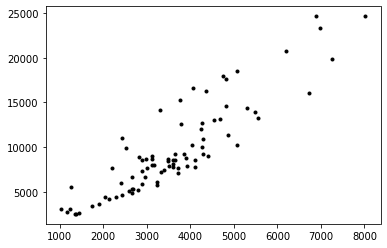

In [9]:
plt.plot(x, y, color='black', marker='.', linestyle='')

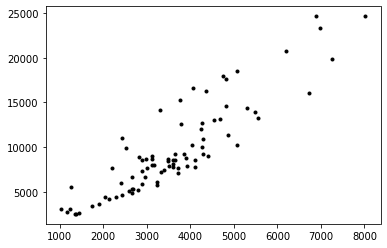

In [10]:
plt.plot(x, y, c='k', marker='.', ls='') # using keyword shortcuts

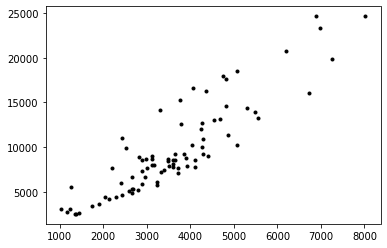

In [11]:
plt.plot(x, y, 'k.') # using special shortcut: 'k' here means color black

Add axis labels, minor ticks in axes, and plot title

Text(0.5, 1.0, "Forbes 100 Celebrities' Wikipedia Pages")

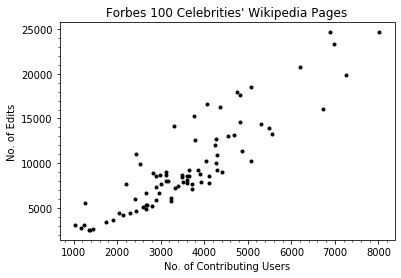

In [17]:
plt.plot(x, y, 'k.')

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")

## Quantify the relationship using:
1. Mean Ratio

In [19]:
mean_ratio = np.mean(y/x)
mean_ratio

2.609397656944558

## Overlay in plot the line: y = mean_ratio * x

In [21]:
xx = np.linspace(800, 8400, 1000)
yy = mean_ratio * xx

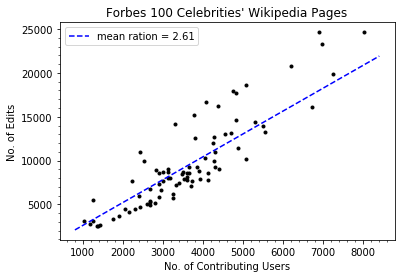

In [22]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label = "mean ration = %.2f" % mean_ratio)

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)

## Quantify the relationship using:

1. Linear Regression Fit: y vs. (x-mean(x))

In [23]:
x_mean = np.mean(x)
x_mean

3604.2073170731705

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x-x_mean, y)

In [25]:
slope, intercept

(3.17979447002623, 9626.134146341463)

In [26]:
r_value, p_value, std_err

(0.8905379922596317, 4.2851570848775055e-29, 0.18160425239314262)

## Overlay in plot the linear regression fit:
* y = slope * (x - x_mean) + intercept

In [28]:
xx_fit = xx - x_mean
yy_fit = slope*xx_fit + intercept

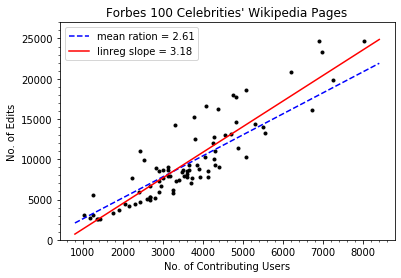

In [29]:
plt.plot(x, y, 'k.')
plt.plot(xx, yy, 'b--', label = "mean ration = %.2f" % mean_ratio)
plt.plot(xx, yy_fit, 'r-', label = "linreg slope = %.2f" % slope)

# add axis labels
plt.xlabel("No. of Contributing Users")
plt.ylabel("No. of Edits")
plt.minorticks_on()
plt.title("Forbes 100 Celebrities' Wikipedia Pages")
plt.legend(loc="upper left", numpoints=1)
plt.ylim((0, 27000))

# save to PNG file
plt.savefig("DIY_Data_Analytics/fig/fig_wikipedia_users_vs_no_of_edits.png")